<a href="https://colab.research.google.com/github/LUCASDNORONHA/Emotion_Classification-NLP/blob/main/Emotions_Classification_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Linguagem Natural - Classificação de Texto

## Carregamento da Base de Dados

In [5]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [6]:
base_dados.sample(5)

,texto,emocao
43,eu nunca tive dúvidas,alegria
155,calma eu não estou com o dinheiro,medo
160,fuja! o tigre parece faminto,medo
120,na selva tem muitos animais perigosos,medo
0,este trabalho é agradável,alegria


In [15]:
base_dados['emocao'].value_counts()

alegria    112
medo        84
Name: emocao, dtype: int64

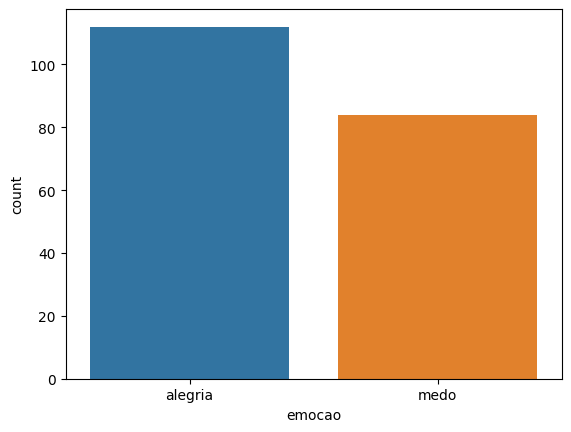

In [21]:
contagem_emocoes = base_dados['emocao'].value_counts()

sns.countplot(x='emocao', data=base_dados);

## Função para pré-processamento dos textos

In [22]:
pontuacao = string.punctuation
pontuacao

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS

In [24]:
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [25]:
len(stop_words)

416

In [26]:
pln = spacy.load('pt_core_news_sm')

In [27]:
pln

In [43]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacao]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista

In [46]:
texto = preprocessamento('Estou aprendendo 1 10 23 processamento de linguangem natural, Curso em Brasília')
texto

'aprender processamento linguangem natural curso brasília'

## Pré-processamento da base de dados

In [47]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [48]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [49]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


## Tratamento da classe

In [50]:
exemplos_bases_dados = [['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}],
                        ['este trabalho continua assustador', {'ALEGRIA': False,  'MEDO': True}]]

In [53]:
type(exemplos_bases_dados)

list

In [54]:
exemplos_bases_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [55]:
exemplos_bases_dados[1]

['este trabalho continua assustador', {'ALEGRIA': False, 'MEDO': True}]

In [56]:
exemplos_bases_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [57]:
type(exemplos_bases_dados[0][1])

dict

In [99]:
base_dados_final = []
i = 0
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA':True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({"AlEGRIA": False, "MEDO": True})

  base_dados_final.append([texto, dic.copy()])

In [92]:
len(base_dados_final)

196

In [62]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [63]:
base_dados_final[0][0]

'trabalho agradável'

In [64]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [65]:
type(base_dados_final[0][1])

dict

In [67]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

## Criação do classificador

In [72]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [104]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7018644511699677}
{'textcat': 3.106632030618062e-11}
{'textcat': 3.87220103529283e-12}
{'textcat': 1.0820478017824035e-12}
{'textcat': 3.610842941109086e-13}
{'textcat': 1.538710675327436e-13}
{'textcat': 7.092950562287946e-14}
{'textcat': 3.995671697325329e-14}
{'textcat': 1.8711895364440987e-14}
{'textcat': 9.710356511156398e-15}


In [109]:
from spacy.training.example import Example

modelo.begin_training()
historico = []

for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}

    # Atualização do código para percorrer o conjunto de dados em lotes
    for batch in spacy.util.minibatch(base_dados_final, 30):
        examples = []
        for texto, entidades in batch:
            doc = modelo.make_doc(texto)
            example = Example.from_dict(doc, {"cats": entidades})
            examples.append(example)

        # Atualização da chamada para a função 'update' com a lista de exemplos
        modelo.update(examples, losses=losses)

    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 1.706557884812355}
{'textcat': 2.9336328288484537e-11}
{'textcat': 3.931201745426341e-12}
{'textcat': 9.44672901644246e-13}
{'textcat': 3.403542469290321e-13}
{'textcat': 1.450793576663863e-13}
{'textcat': 6.651860399642579e-14}
{'textcat': 3.209958429738083e-14}
{'textcat': 1.7109855470365948e-14}
{'textcat': 9.240419005659907e-15}


In [110]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [111]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.70655788e+00, 2.93363283e-11, 3.93120175e-12, 9.44672902e-13,
       3.40354247e-13, 1.45079358e-13, 6.65186040e-14, 3.20995843e-14,
       1.71098555e-14, 9.24041901e-15])

Text(0, 0.5, 'Erro')

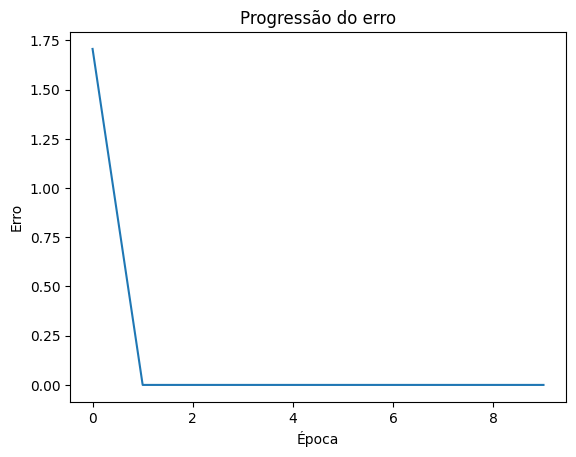

In [112]:
import matplotlib.pyplot as plt

plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Época')
plt.ylabel('Erro')

In [113]:
modelo.to_disk('modelo')

## Teste com uma frase

In [114]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [115]:
texto_positivo = 'Eu adoro cor dos seus olhos'

In [117]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [121]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [122]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 3.8314173167464105e-08}

In [123]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 1.0644149597283104e-06, 'MEDO': 0.999998927116394}

## Avaliação: Base de Treinamento

In [125]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [126]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 9.456076810465674e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.307464879753752e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1101993102613505e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.6812935044185906e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.533038998668417e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.758213663549668e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.316131369501818e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.9358906417087383e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.5764212097101336e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.6650753543199244e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.313551820762541e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.7428517296025348e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.4161126432886704e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.6880975485285035e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.6851060042076824e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0272070244686802e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.3988028513267636e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.774256071182208e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.6868536789615973e-08},
 {'ALEGRIA': 1.0, 'MEDO': 7.5348003392

In [128]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [129]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [130]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(respostas_reais, previsoes_final)

1.0

In [133]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação:  Base de Teste

In [138]:
base_dados_teste = pd.read_csv('/content/base_teste.txt')
base_dados_teste.sample(5)

,texto,emocao
18,estou aproveitando as férias,alegria
15,eu confio em você,alegria
20,é muito divertido este jogo,alegria
70,aterrorizado e suando frio,medo
54,estou angustiada,medo


In [139]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [140]:
base_dados_teste.sample(5)

,texto,emocao
69,aterrorizar lembro,medo
47,útimo show,alegria
38,agradeço imensamente em este dia,alegria
46,garota,alegria
32,concretizar ideia,alegria


In [142]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [143]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [144]:
respostas_reais = base_dados_teste['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [145]:
accuracy_score(respostas_reais, previsoes_final)

0.5476190476190477

In [146]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[28, 20],
       [18, 18]])